<a href="https://colab.research.google.com/github/v-sadface/v-project/blob/main/TCS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# importing various libraries I feel I will need

In [2]:
data = pd.read_csv('/content/fetal_health.csv')
data.head()
# NOTE that 1=normal, 2=suspicious, 3=pathological

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
features = data['baseline value']
label = data['fetal_health']
# I was originally going to do some visualization, so I had this prepared,
# though I did not follow through with this

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


In [7]:
data['baseline value'].value_counts()

,count
baseline value,
133.0,136
130.0,111
122.0,109
138.0,103
125.0,91
128.0,85
120.0,78
142.0,77
144.0,77


In [8]:
less_data = data.drop(columns=['severe_decelerations', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'])

In [9]:
less_data.shape

(2126, 12)

In [10]:
grouped_data = less_data.groupby('fetal_health')
pathological = grouped_data.get_group(3)
pathological.head()
suspicious = grouped_data.get_group(2)
normal = grouped_data.get_group(1)

(array([ 6.,  0., 25., 12., 38., 58.,  6.,  4.,  6., 21.]),
 array([110. , 114.2, 118.4, 122.6, 126.8, 131. , 135.2, 139.4, 143.6,
        147.8, 152. ]),
 <BarContainer object of 10 artists>)

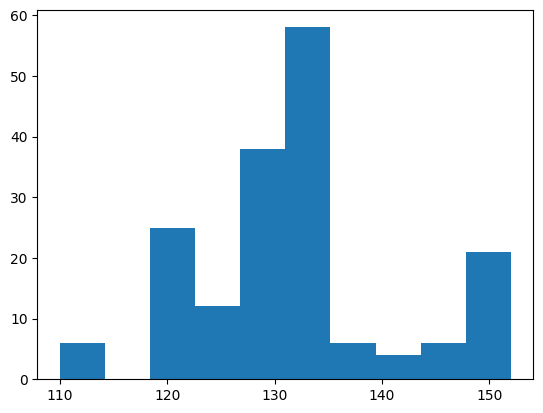

In [11]:
plt.hist(pathological['baseline value'], bins=10)

(array([10.,  6., 17., 23., 49., 51., 68., 51., 11.,  9.]),
 array([120. , 123.9, 127.8, 131.7, 135.6, 139.5, 143.4, 147.3, 151.2,
        155.1, 159. ]),
 <BarContainer object of 10 artists>)

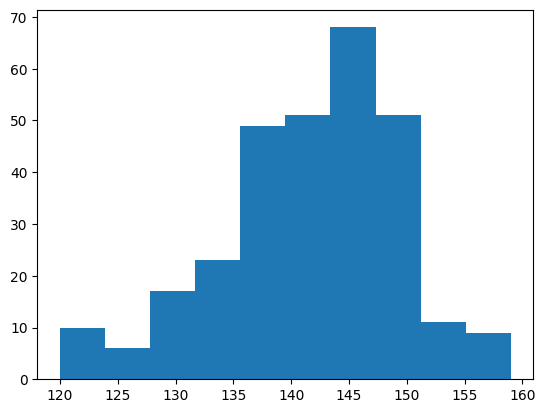

In [12]:
plt.hist(suspicious['baseline value'])

(array([ 22.,  60., 231., 230., 316., 390., 216., 151.,  17.,  22.]),
 array([106. , 111.4, 116.8, 122.2, 127.6, 133. , 138.4, 143.8, 149.2,
        154.6, 160. ]),
 <BarContainer object of 10 artists>)

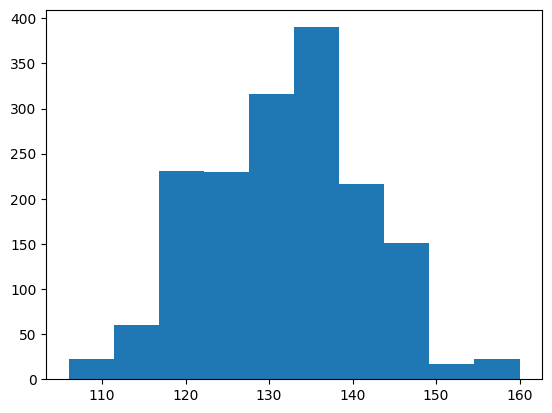

In [13]:
plt.hist(normal['baseline value'])

In [14]:
cleaner_data = less_data.drop(columns=['accelerations', 'mean_value_of_short_term_variability', 'light_decelerations', 'prolongued_decelerations'])
cleaner_data.head(10)

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
0,120.0,0.0,0.000,73.0,43.0,2.4,0.0,2.0
1,132.0,0.0,0.006,17.0,0.0,10.4,1.0,1.0
2,133.0,0.0,0.008,16.0,0.0,13.4,1.0,1.0
3,134.0,0.0,0.008,16.0,0.0,23.0,0.0,1.0
4,132.0,0.0,0.008,16.0,0.0,19.9,0.0,1.0
5,134.0,0.0,0.010,26.0,0.0,0.0,3.0,3.0
6,134.0,0.0,0.013,29.0,0.0,0.0,3.0,3.0
7,122.0,0.0,0.000,83.0,6.0,15.6,0.0,3.0
8,122.0,0.0,0.002,84.0,5.0,13.6,0.0,3.0
9,122.0,0.0,0.003,86.0,6.0,10.6,0.0,3.0


In [15]:
cleaner_data.corr()

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
baseline value,1.000000,-0.033436,-0.146373,0.305570,0.285630,-0.032091,-0.004745,0.148151
fetal_movement,-0.033436,1.000000,-0.068779,-0.103715,-0.074096,0.011047,-0.017749,0.088010
uterine_contractions,-0.146373,-0.068779,1.000000,-0.232811,-0.306608,-0.066058,0.057894,-0.204894
abnormal_short_term_variability,0.305570,-0.103715,-0.232811,1.000000,0.459413,-0.315105,-0.149296,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.074096,-0.306608,0.459413,1.000000,-0.171114,-0.121784,0.426146
mean_value_of_long_term_variability,-0.032091,0.011047,-0.066058,-0.315105,-0.171114,1.000000,0.123869,-0.226797
histogram_number_of_zeroes,-0.004745,-0.017749,0.057894,-0.149296,-0.121784,0.123869,1.000000,-0.016682
fetal_health,0.148151,0.088010,-0.204894,0.471191,0.426146,-0.226797,-0.016682,1.000000


In [16]:
# Ok this is me deciding that everything I've done is lowkey cold garbage

In [17]:
model = KNeighborsClassifier(n_neighbors = 5)

In [18]:
from sklearn import model_selection

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
									features, label,
									test_size = 0.2,
									random_state = 42)

In [20]:
# Hi ok now what I'm going to do is try to make bar graphs out of the three different
# groups (normal, suspicious, and pathological), and combine them

In [21]:
cleaner_data.head()

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
0,120.0,0.0,0.000,73.0,43.0,2.4,0.0,2.0
1,132.0,0.0,0.006,17.0,0.0,10.4,1.0,1.0
2,133.0,0.0,0.008,16.0,0.0,13.4,1.0,1.0
3,134.0,0.0,0.008,16.0,0.0,23.0,0.0,1.0
4,132.0,0.0,0.008,16.0,0.0,19.9,0.0,1.0


In [22]:
# there are 48 "bins" in the baseline value column

In [23]:
cleaner_data['baseline value str'] = cleaner_data['baseline value'].astype(str)

In [24]:
cleaner_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   fetal_movement                                          2126 non-null   float64
 2   uterine_contractions                                    2126 non-null   float64
 3   abnormal_short_term_variability                         2126 non-null   float64
 4   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 5   mean_value_of_long_term_variability                     2126 non-null   float64
 6   histogram_number_of_zeroes                              2126 non-null   float64
 7   fetal_health                                            2126 non-null   float64
 8   baseline value str                     

In [25]:
# ok few problems: how do I change the 'baseline value str' to be in ascending order
#                  how do I get the specific value counts for specific numbers in my graph

In [26]:
cleaner_data= cleaner_data.sort_values(by=['baseline value str'])
cleaner_data = cleaner_data.sort_values(by=['baseline value'])
cleaner_data.tail()
# ok so this solves my first problem, yay!

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health,baseline value str
127,159.0,0.0,0.003,62.0,6.0,13.2,0.0,2.0,159.0
133,159.0,0.0,0.008,61.0,8.0,8.6,0.0,1.0,159.0
128,159.0,0.0,0.003,65.0,11.0,6.8,0.0,2.0,159.0
134,159.0,0.0,0.010,58.0,0.0,7.9,0.0,1.0,159.0
1757,160.0,0.0,0.008,58.0,0.0,8.2,0.0,1.0,160.0


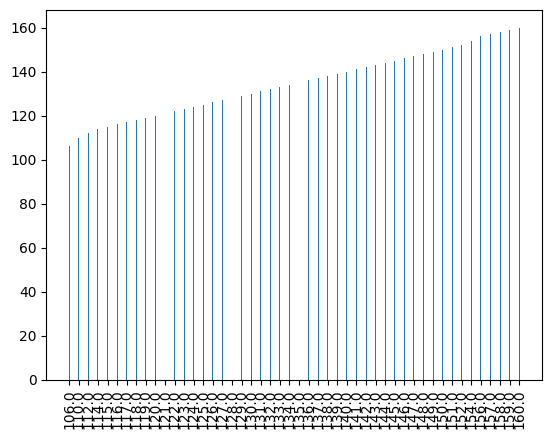

In [27]:
plt.bar(cleaner_data['baseline value str'], cleaner_data['baseline value'], width=0.1)
plt.xticks(rotation = 90)
plt.show()

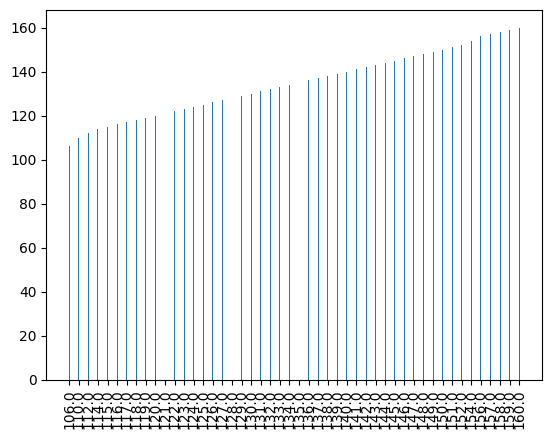

In [28]:
plt.bar(cleaner_data['baseline value str'], cleaner_data['baseline value'], width=0.1)
plt.xticks(rotation = 90)
plt.show()
# hypothesis: the graph should look like sorted bars that are ascending in height

In [29]:
# ok now I want my y-value to be the value counts for each of the 48 sections in baseline value str

<BarContainer object of 2126 artists>

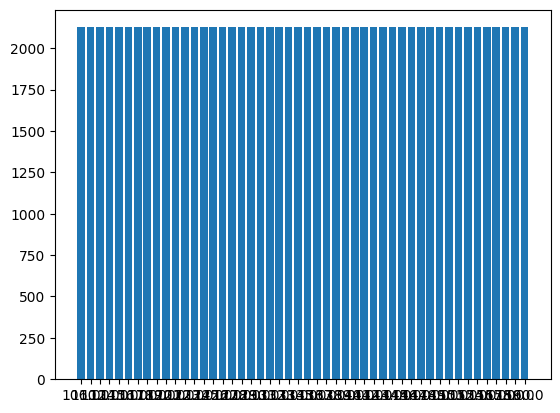

In [30]:
plt.bar(cleaner_data['baseline value str'], len(cleaner_data['baseline value str']))

In [31]:
cleaner_data['baseline value new'] = cleaner_data['baseline value'].value_counts()
cleaner_data['baseline value new'].dropna()

,baseline value new
157,4.0
158,10.0
119,17.0
118,9.0
120,78.0
124,10.0
121,44.0
122,109.0
123,56.0
156,4.0


In [32]:
#ok this is dumb. NEW PIVOT: create a new dataset with baseline value and their respective value counts

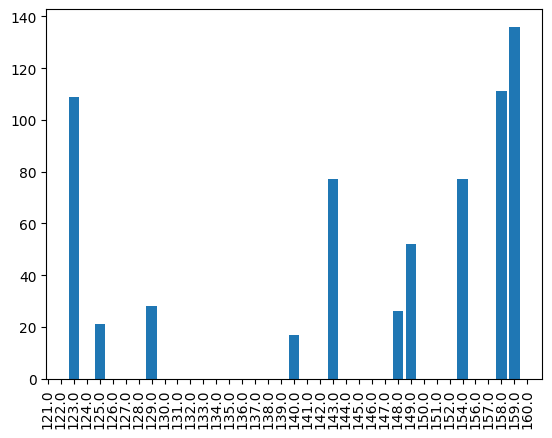

In [33]:
plt.bar(cleaner_data['baseline value str'], cleaner_data['baseline value new'])
plt.xticks(rotation = 90)
plt.show()
# hypothesis: the graph will have the x-axis values in ascending order, and the graph will look somewhat normal

In [34]:
cleaner_data.drop(columns=['baseline value new'])

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health,baseline value str
1663,106.0,0.0,0.010,63.0,0.0,12.4,0.0,1.0,106.0
1659,106.0,0.0,0.009,62.0,0.0,12.7,0.0,1.0,106.0
1660,106.0,0.0,0.010,63.0,0.0,14.1,0.0,1.0,106.0
1661,106.0,0.0,0.010,63.0,0.0,13.5,0.0,1.0,106.0
1662,106.0,0.0,0.011,63.0,0.0,11.5,0.0,1.0,106.0
...,...,...,...,...,...,...,...,...,...
127,159.0,0.0,0.003,62.0,6.0,13.2,0.0,2.0,159.0
133,159.0,0.0,0.008,61.0,8.0,8.6,0.0,1.0,159.0
128,159.0,0.0,0.003,65.0,11.0,6.8,0.0,2.0,159.0
134,159.0,0.0,0.010,58.0,0.0,7.9,0.0,1.0,159.0


In [35]:
new_data = cleaner_data[['baseline value str', 'baseline value']]
new_data.head()

,baseline value str,baseline value
1663,106.0,106.0
1659,106.0,106.0
1660,106.0,106.0
1661,106.0,106.0
1662,106.0,106.0


In [36]:
pathological.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
5,134.0,0.001,0.0,0.010,0.009,0.002,26.0,5.9,0.0,0.0,3.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.003,29.0,6.3,0.0,0.0,3.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.000,83.0,0.5,6.0,15.6,0.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.000,84.0,0.5,5.0,13.6,0.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.000,86.0,0.3,6.0,10.6,0.0,3.0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_path = pd.DataFrame(scaler.fit_transform(pathological), columns=pathological.columns)
new_sus = pd.DataFrame(scaler.fit_transform(suspicious), columns=suspicious.columns)
new_norm = pd.DataFrame(scaler.fit_transform(normal), columns=normal.columns)

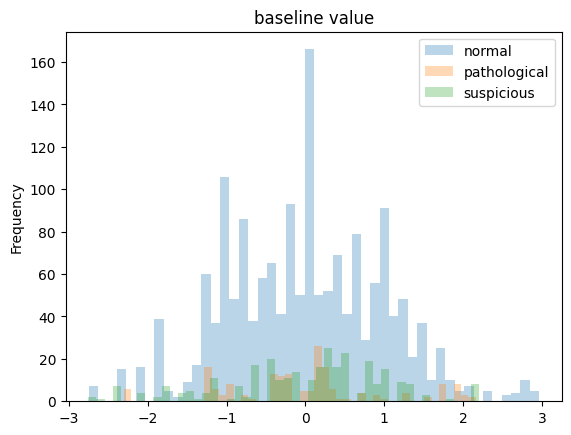

In [38]:
new_norm['baseline value'].plot(kind='hist', bins=48, title='baseline value', alpha = 0.3)
new_path['baseline value'].plot(kind='hist', bins=48, title='baseline value', alpha = 0.3)
new_sus['baseline value'].plot(kind='hist', bins=48, title='baseline value', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

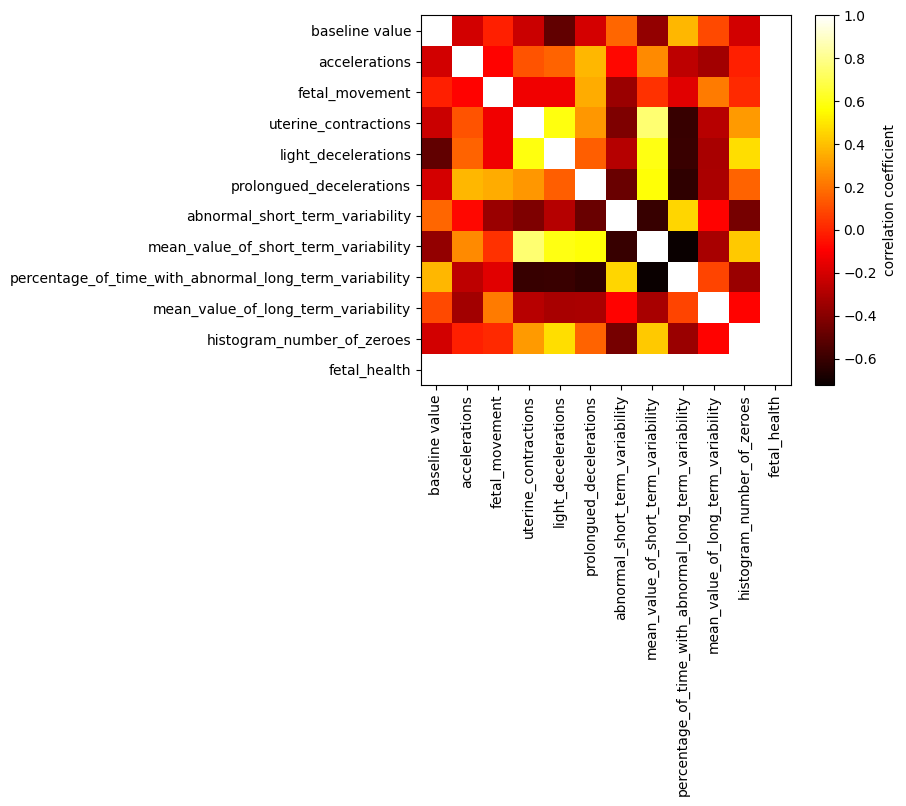

In [39]:
corr = pathological.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar(label = 'correlation coefficient')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

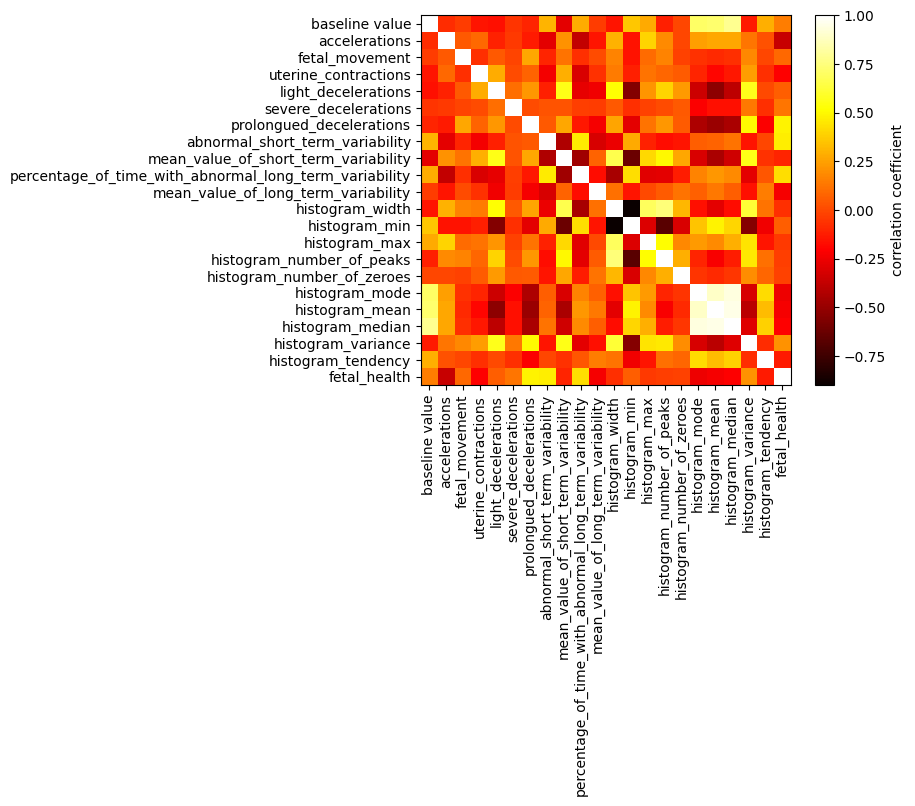

In [40]:
corr1 = data.corr()
plt.imshow(corr1, cmap='hot', interpolation='none')
plt.colorbar(label = 'correlation coefficient')
plt.xticks(range(len(corr1)), corr1.columns, rotation=90)
plt.yticks(range(len(corr1)), corr1.columns)
plt.show()

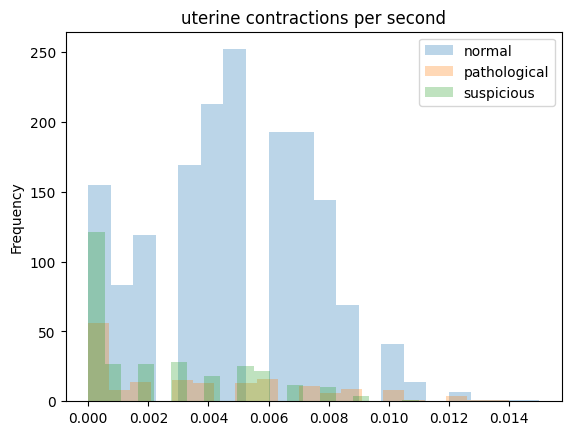

In [41]:
normal['uterine_contractions'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['uterine_contractions'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['uterine_contractions'].plot(kind='hist', bins=20,title = 'uterine contractions per second', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

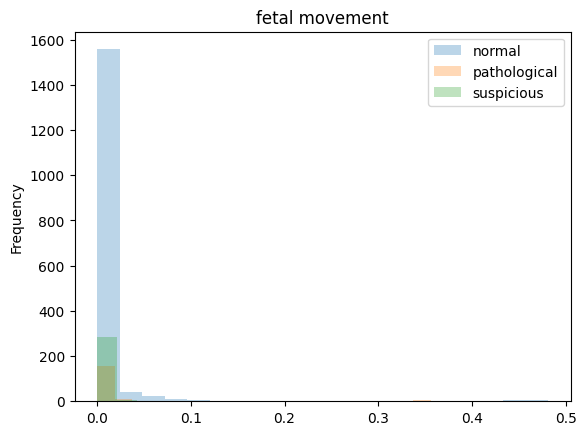

In [42]:
normal['fetal_movement'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['fetal_movement'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['fetal_movement'].plot(kind='hist', bins=20,title = 'fetal movement', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

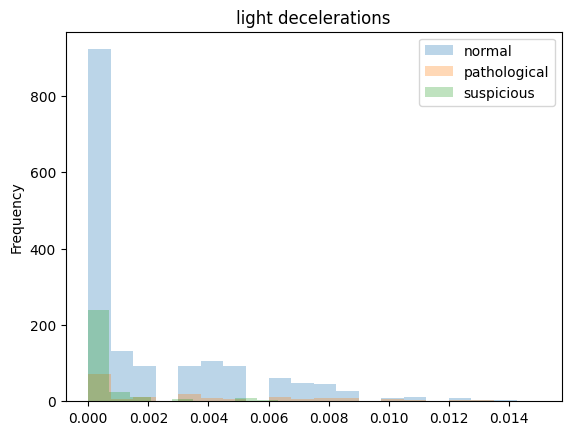

In [43]:
normal['light_decelerations'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['light_decelerations'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['light_decelerations'].plot(kind='hist', bins=20,title = 'light decelerations', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

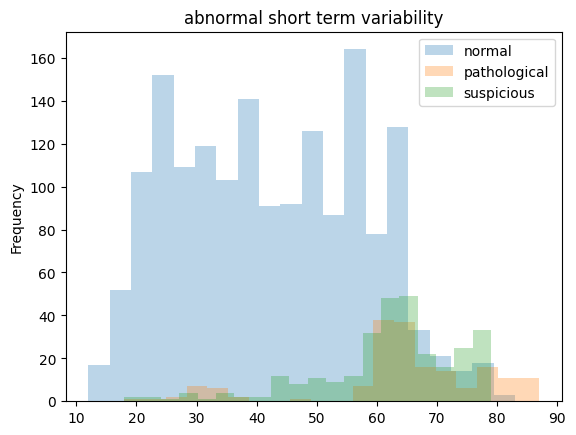

In [44]:
normal['abnormal_short_term_variability'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['abnormal_short_term_variability'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['abnormal_short_term_variability'].plot(kind='hist', bins=20,title = 'abnormal short term variability', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

In [45]:
normal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
1,132.0,0.006,0.000,0.006,0.003,0.0,17.0,2.1,0.0,10.4,1.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,16.0,2.1,0.0,13.4,1.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,16.0,2.4,0.0,23.0,0.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,16.0,2.4,0.0,19.9,0.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,28.0,1.4,0.0,12.9,0.0,1.0


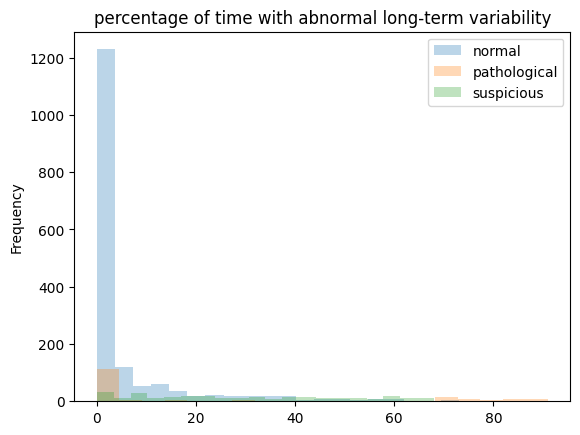

In [46]:
normal['percentage_of_time_with_abnormal_long_term_variability'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['percentage_of_time_with_abnormal_long_term_variability'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['percentage_of_time_with_abnormal_long_term_variability'].plot(kind='hist', bins=20,title = 'percentage of time with abnormal long-term variability', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

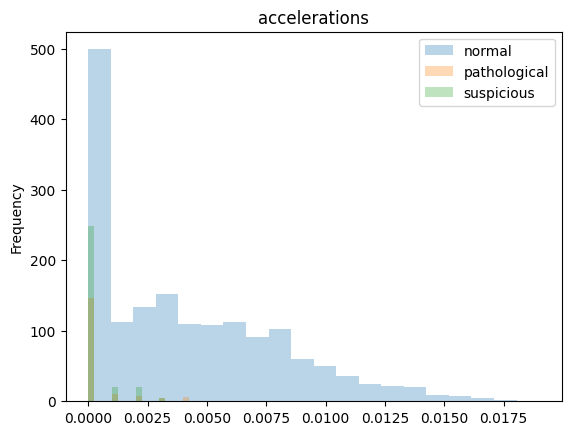

In [47]:
normal['accelerations'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['accelerations'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['accelerations'].plot(kind='hist', bins=20,title = 'accelerations', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

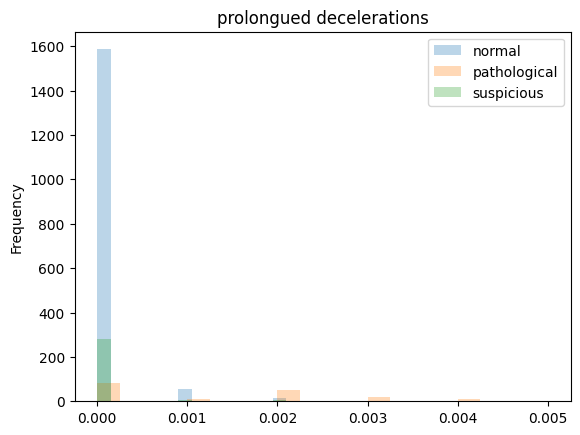

In [48]:
normal['prolongued_decelerations'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['prolongued_decelerations'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['prolongued_decelerations'].plot(kind='hist', bins=20,title = 'prolongued decelerations', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

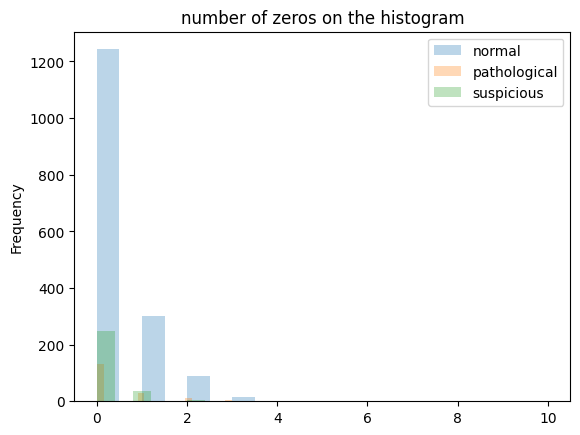

In [49]:
normal['histogram_number_of_zeroes'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['histogram_number_of_zeroes'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['histogram_number_of_zeroes'].plot(kind='hist', bins=20,title = 'number of zeros on the histogram', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()

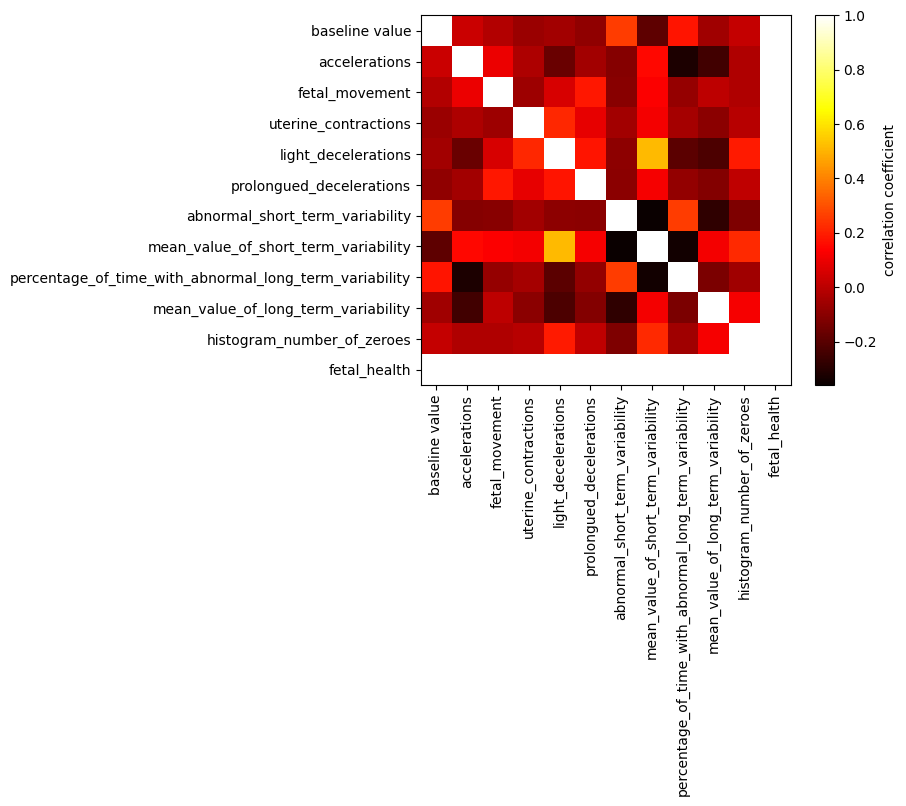

In [50]:
corr2 = normal.corr()
plt.imshow(corr2, cmap='hot', interpolation='none')
plt.colorbar(label = 'correlation coefficient')
plt.xticks(range(len(corr2)), corr2.columns, rotation=90)
plt.yticks(range(len(corr2)), corr2.columns)
plt.show()

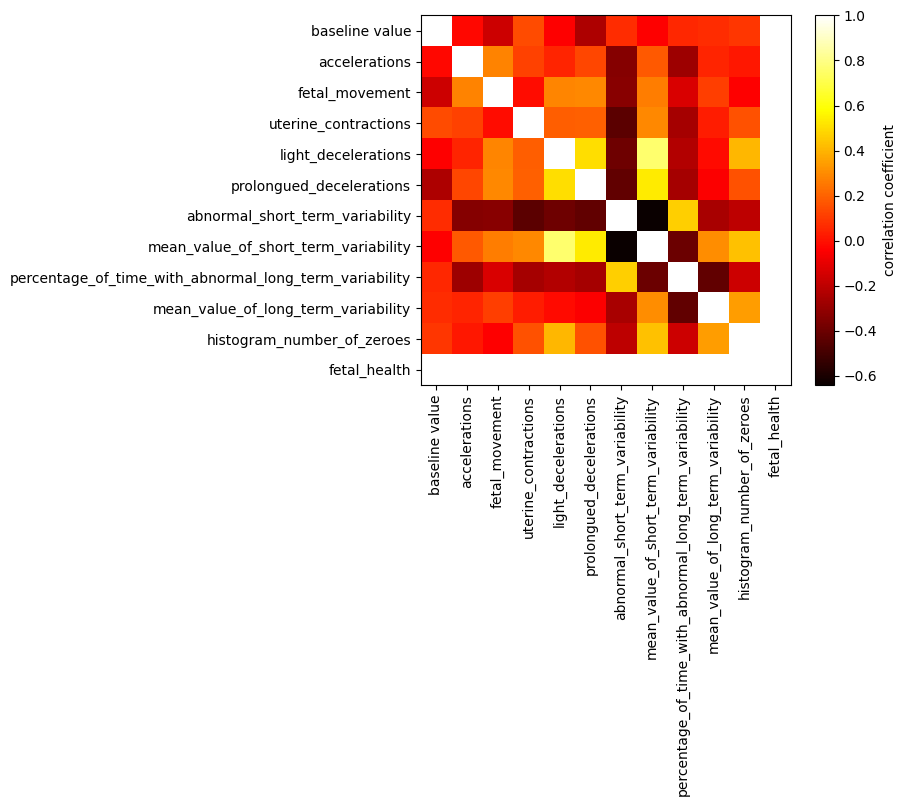

In [51]:
corr3 = suspicious.corr()
plt.imshow(corr3, cmap='hot', interpolation='none')
plt.colorbar(label = 'correlation coefficient')
plt.xticks(range(len(corr3)), corr3.columns, rotation=90)
plt.yticks(range(len(corr3)), corr3.columns)
plt.show()

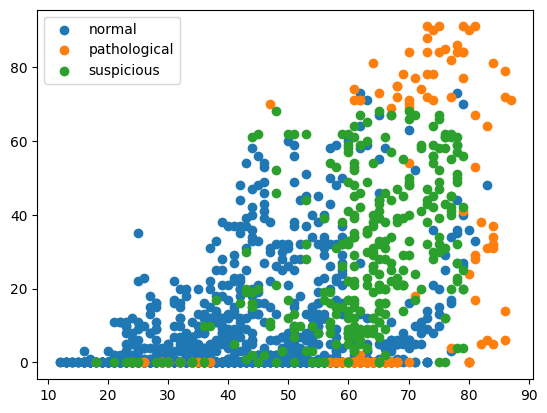

In [52]:
plt.scatter(normal['abnormal_short_term_variability'], normal['percentage_of_time_with_abnormal_long_term_variability'], label='normal')
plt.scatter(pathological['abnormal_short_term_variability'], pathological['percentage_of_time_with_abnormal_long_term_variability'], label='pathological')
plt.scatter(suspicious['abnormal_short_term_variability'], suspicious['percentage_of_time_with_abnormal_long_term_variability'], label='suspicious')
plt.legend()
plt.show()

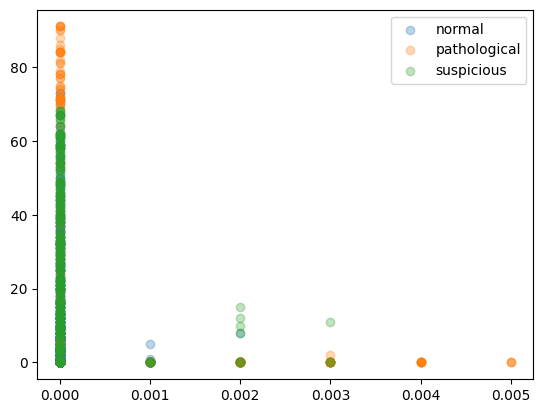

In [53]:
plt.scatter(normal['prolongued_decelerations'], normal['percentage_of_time_with_abnormal_long_term_variability'], label='normal', alpha=0.3)
plt.scatter(pathological['prolongued_decelerations'], pathological['percentage_of_time_with_abnormal_long_term_variability'], label='pathological', alpha=0.3)
plt.scatter(suspicious['prolongued_decelerations'], suspicious['percentage_of_time_with_abnormal_long_term_variability'], label='suspicious', alpha=0.3)
plt.legend()
plt.show()

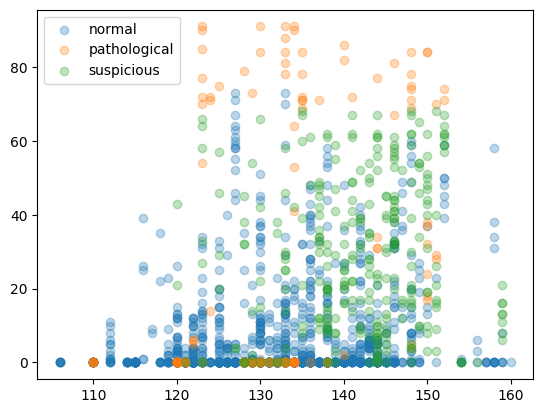

In [54]:
plt.scatter(normal['baseline value'], normal['percentage_of_time_with_abnormal_long_term_variability'], label='normal', alpha=0.3)
plt.scatter(pathological['baseline value'], pathological['percentage_of_time_with_abnormal_long_term_variability'], label='pathological', alpha=0.3)
plt.scatter(suspicious['baseline value'], suspicious['percentage_of_time_with_abnormal_long_term_variability'], label='suspicious', alpha=0.3)
plt.legend()
plt.show()

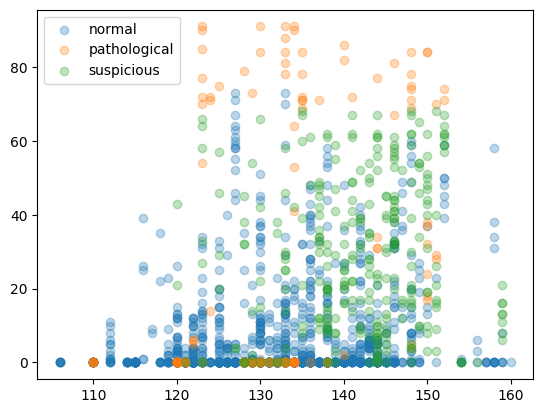

In [55]:
plt.scatter(normal['baseline value'], normal['percentage_of_time_with_abnormal_long_term_variability'], label='normal', alpha=0.3)
plt.scatter(pathological['baseline value'], pathological['percentage_of_time_with_abnormal_long_term_variability'], label='pathological', alpha=0.3)
plt.scatter(suspicious['baseline value'], suspicious['percentage_of_time_with_abnormal_long_term_variability'], label='suspicious', alpha=0.3)
plt.legend()
plt.show()

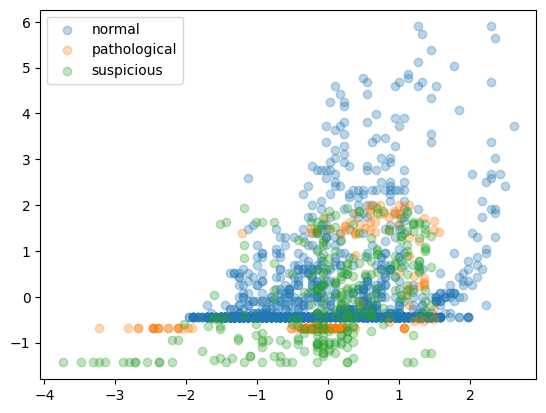

In [56]:
plt.scatter(new_norm['abnormal_short_term_variability'], new_norm['percentage_of_time_with_abnormal_long_term_variability'], label='normal', alpha=0.3)
plt.scatter(new_path['abnormal_short_term_variability'], new_path['percentage_of_time_with_abnormal_long_term_variability'], label='pathological', alpha=0.3)
plt.scatter(new_sus['abnormal_short_term_variability'], new_sus['percentage_of_time_with_abnormal_long_term_variability'], label='suspicious', alpha=0.3)
plt.legend()
plt.show()

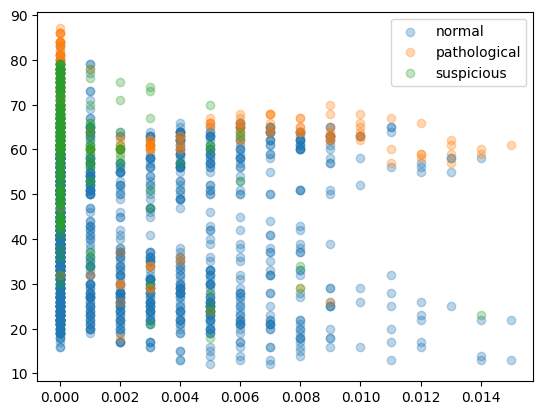

In [57]:
plt.scatter(normal['light_decelerations'], normal['abnormal_short_term_variability'], label='normal', alpha=0.3)
plt.scatter(pathological['light_decelerations'], pathological['abnormal_short_term_variability'], label='pathological', alpha=0.3)
plt.scatter(suspicious['light_decelerations'], suspicious['abnormal_short_term_variability'], label='suspicious', alpha=0.3)
plt.legend()
plt.show()

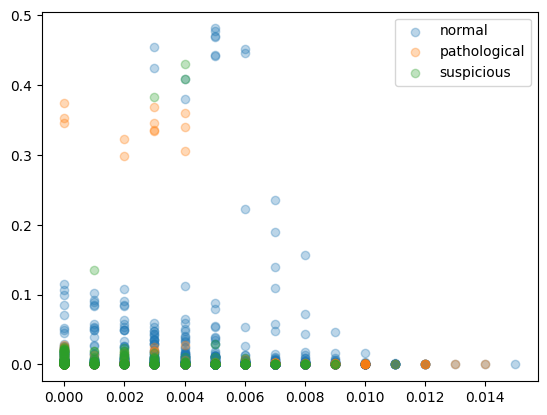

In [58]:
plt.scatter(normal['uterine_contractions'], normal['fetal_movement'], label='normal', alpha=0.3)
plt.scatter(pathological['uterine_contractions'], pathological['fetal_movement'], label='pathological', alpha=0.3)
plt.scatter(suspicious['uterine_contractions'], suspicious['fetal_movement'], label='suspicious', alpha=0.3)
plt.legend()
plt.show()

In [59]:
features = cleaner_data[["abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability"]]
label = cleaner_data[["fetal_health"]]

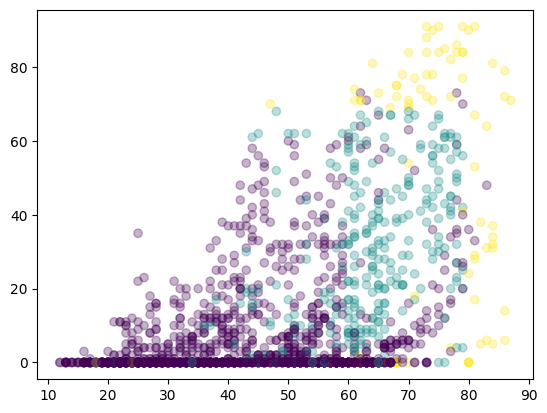

In [60]:
plt.scatter(features['abnormal_short_term_variability'], features['percentage_of_time_with_abnormal_long_term_variability'], alpha=0.3, c=label['fetal_health'])
plt.show()

In [61]:
from sklearn import model_selection

In [62]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

In [63]:
model = KNeighborsClassifier(n_neighbors=47)

In [64]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
from sklearn import metrics

In [66]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.8849765258215962


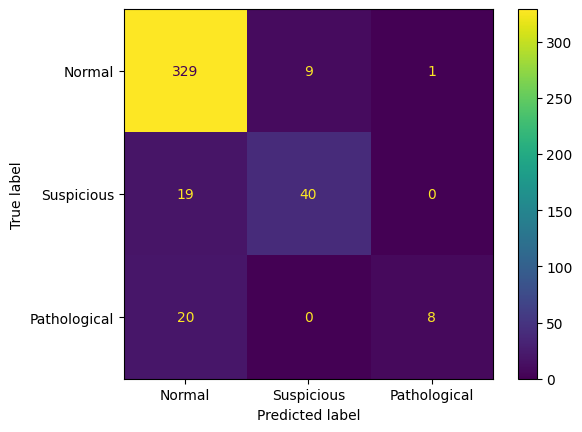

In [67]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["Normal", "Suspicious", "Pathological"])
plt.show()

In [68]:
# make another KNN model, but with features from my original research question

features1 = cleaner_data[["fetal_movement", "uterine_contractions"]]
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train1, y_train1)
pred1 = model1.predict(X_test1)
print("Accuracy Score: ", metrics.accuracy_score(y_test1, pred1))

Accuracy Score:  0.8568075117370892


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


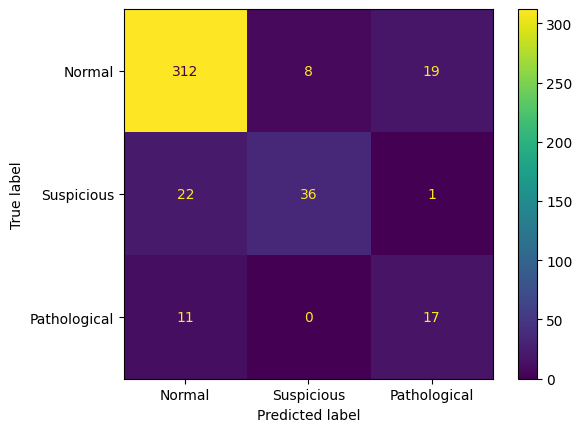

In [69]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test1, pred1, display_labels=["Normal", "Suspicious", "Pathological"])
plt.show()

In [70]:
# ok why is it showing me the exact same confusion matrix

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
# k-folds cross validation try
knn = KNeighborsClassifier(n_neighbors = 31)

scores = cross_val_score(knn, X_train, y_train, cv = 10)
print("10-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


10-Folds CV Scores: 0.8617647058823531 +/- 0.023712522789113392


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [73]:
clean_data = cleaner_data.drop(columns='baseline value new')
clean_data['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


In [74]:
# working on oversampling
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(sampling_strategy='not majority')
x,y = smote.fit_resample(features, label)
y.value_counts()

,count
fetal_health,
1.0,1655
2.0,1655
3.0,1655


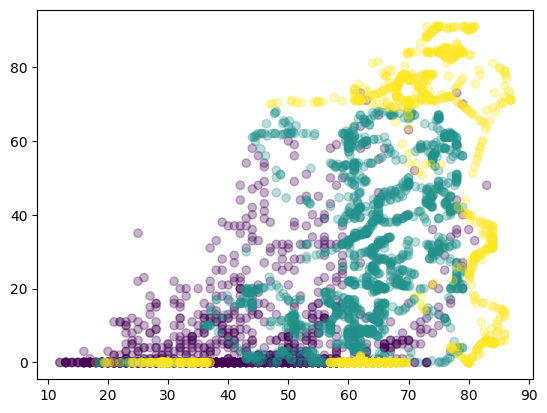

In [76]:
plt.scatter(x['abnormal_short_term_variability'], x['percentage_of_time_with_abnormal_long_term_variability'], alpha=0.3, c=y['fetal_health'])
plt.show()

In [77]:
mdl = KNeighborsClassifier(n_neighbors=3)
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(x, y, test_size=0.45, random_state=42)

In [78]:
mdl.fit(X_tr, y_tr)
pred1 = mdl.predict(X_te)
print("Accuracy Score: ", metrics.accuracy_score(y_te, pred1))

Accuracy Score:  0.8460850111856824


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


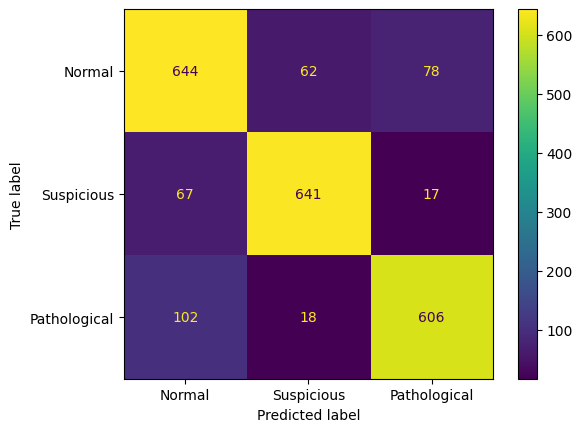

In [79]:
metrics.ConfusionMatrixDisplay.from_predictions(y_te, pred1, display_labels=["Normal", "Suspicious", "Pathological"])
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_te, pred1))

              precision    recall  f1-score   support

         1.0       0.79      0.82      0.81       784
         2.0       0.89      0.88      0.89       725
         3.0       0.86      0.83      0.85       726

    accuracy                           0.85      2235
   macro avg       0.85      0.85      0.85      2235
weighted avg       0.85      0.85      0.85      2235



In [81]:
from scipy.stats import ttest_ind

In [82]:
pathological_fm = pathological['fetal_movement']
pathological_a = pathological['accelerations']
t_stat, p_value = ttest_ind(pathological_fm, pathological_a)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# but is this the way it is because they are mesured on different scales?

t-statistic:  3.9107871534209657
p-value:  0.00011050191469151755


In [83]:
pathological_fm = pathological['fetal_movement']
suspicious_fm = suspicious['fetal_movement']

t_stat, p_value = ttest_ind(pathological_fm, suspicious_fm)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  2.9406520898642166
p-value:  0.00343711689558509


In [84]:
normal_fm = normal['fetal_movement']

t_stat, p_value = ttest_ind(pathological_fm, normal_fm)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  4.73831226812519
p-value:  2.321371271144264e-06


In [85]:
t_stat, p_value = ttest_ind(suspicious_fm, normal_fm)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  0.14209756887488753
p-value:  0.8870176326744513


In [86]:
pathological_ld = pathological['light_decelerations']
suspicious_ld = suspicious['light_decelerations']

t_stat, p_value = ttest_ind(pathological_ld, suspicious_ld)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  11.733646653143007
p-value:  4.691665015791781e-28


In [87]:
normal_ld = normal['light_decelerations']

t_stat, p_value = ttest_ind(pathological_ld, normal_ld)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  7.190121828461965
p-value:  9.394173688832905e-13


In [88]:
t_stat, p_value = ttest_ind(normal_ld, suspicious_ld)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  8.147904038687546
p-value:  6.545963450273844e-16


In [89]:
pathological_astv = pathological['abnormal_short_term_variability']
suspicious_astv = suspicious['abnormal_short_term_variability']

t_stat, p_value = ttest_ind(pathological_astv, suspicious_astv)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  2.1585711871537896
p-value:  0.03139010402516177


In [90]:
normal_astv = normal['abnormal_short_term_variability']

t_stat, p_value = ttest_ind(pathological_astv, normal_astv)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  18.07830775561923
p-value:  2.420755087646563e-67


In [91]:
t_stat, p_value = ttest_ind(suspicious_astv, normal_astv)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  20.51161815706841
p-value:  8.192847141621589e-85


In [92]:
pathological_mvostv = pathological['mean_value_of_short_term_variability']
suspicious_mvostv = suspicious['mean_value_of_short_term_variability']

t_stat, p_value = ttest_ind(pathological_mvostv, suspicious_mvostv)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  10.92146053841406
p-value:  6.791064955562175e-25


In [93]:
normal_mvostv = normal['mean_value_of_short_term_variability']

t_stat, p_value = ttest_ind(pathological_mvostv, normal_mvostv)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  2.119086067594241
p-value:  0.03421762900266564


In [94]:
t_stat, p_value = ttest_ind(normal_mvostv, suspicious_mvostv)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  15.714468037608803
p-value:  1.7493224116359407e-52


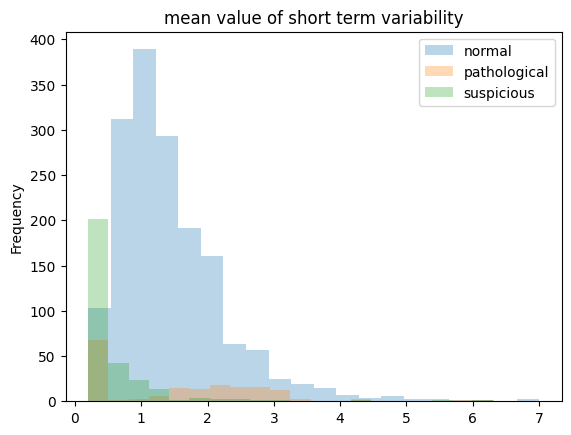

In [95]:
normal['mean_value_of_short_term_variability'].plot(kind='hist', bins=20, alpha = 0.3)
pathological['mean_value_of_short_term_variability'].plot(kind='hist', bins=20, alpha = 0.3)
suspicious['mean_value_of_short_term_variability'].plot(kind='hist', bins=20,title = 'mean value of short term variability', alpha = 0.3)
colors = ['red', 'green', 'blue']
labels = ['normal', 'pathological', 'suspicious']
plt.legend(labels)
plt.show()